# 1 - Decision Trees/Random Forests

[ScikitLearn DecisionTree documentation](https://scikit-learn.org/stable/modules/tree.html#tree)

In [1]:
from sklearn import tree, metrics, ensemble
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

/tmp/ipykernel_20335/2475676374.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
%load_ext autoreload
%autoreload 2

from model import model_poverty_prob

In [3]:
import pickle

with open('mod_.pkl', 'rb') as file:
    mod_ = pickle.load(file)

In [4]:
vars = ['education_level','is_urban','phone_technology','can_use_internet','active_bank_user', 'country__A', 'country__C',
       'country__D',  'country__G','female']

In [5]:
vars = ['female','is_urban',]

In [6]:
dt_reg = tree.DecisionTreeRegressor()
dt_reg = dt_reg.fit(mod_.X_train[vars], mod_.y_train)
dt_reg.predict(mod_.X_test[vars])

array([0.46855   , 0.50486788, 0.68362087, ..., 0.68362087, 0.64878833,
       0.68362087])

In [7]:
dt_reg.feature_names_in_

array(['female', 'is_urban'], dtype=object)

In [8]:
dt_reg.feature_importances_

array([0.04155373, 0.95844627])

[ScikitLearn DecisionTree plot](https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py)

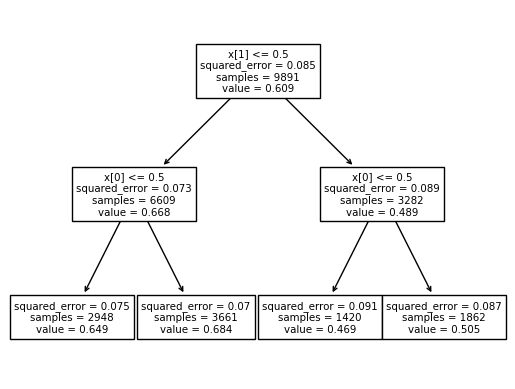

In [9]:
tree.plot_tree(dt_reg)
plt.show()

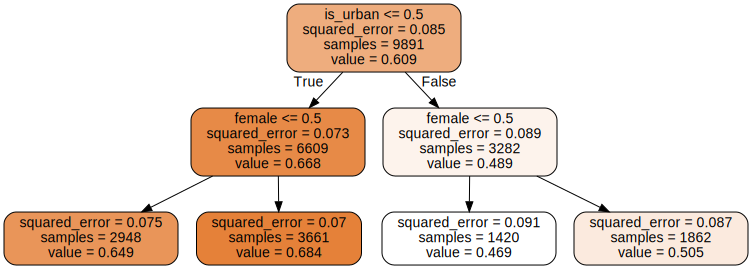

In [10]:
import graphviz

tree.export_graphviz(dt_reg, out_file="dt_reg.dot", 
                feature_names=mod_.X_train[vars].columns,
                # class_names=['0','1','2'], 
                rounded=True, filled=True)

# Import model graph
with open("dt_reg.dot") as f:
    dot_graph = f.read()
    display(graphviz.Source(dot_graph))

# dot_data = tree.export_graphviz(dt_reg, out_file=None) 
# graph = graphviz.Source(dot_data) 
# graph


In [11]:
metrics.mean_squared_error(mod_.y_test,dt_reg.predict(mod_.X_test[vars]))

0.07673741562141873

In [12]:
mod_.model_OLS.params.index[1:]

Index(['education_level', 'is_urban', 'phone_technology', 'can_use_internet',
       'active_bank_user', 'country__A', 'country__C', 'country__D',
       'country__G', 'female'],
      dtype='object')

In [13]:
mod_.model_OLS.predict(pd.merge(pd.DataFrame(
    data={'const' : [1 for i in range(mod_.X_test.shape[0])]},
    index=mod_.X_test[mod_.model_OLS.params.index[1:]].index),
         mod_.X_test[mod_.model_OLS.params.index[1:]],
        left_index = True, right_index = True))

row_id
2728.0     0.480853
11008.0    0.627257
224.0      0.804770
6522.0     0.485168
3220.0     0.485168
             ...   
128.0      0.933482
7168.0     0.829613
1997.0     0.590961
10801.0    0.574494
6247.0     0.688750
Length: 2473, dtype: float64

In [14]:
metrics.mean_squared_error(mod_.y_test,mod_.model_OLS.predict(pd.merge(pd.DataFrame(
    data={'const' : [1 for i in range(mod_.X_test.shape[0])]},
    index=mod_.X_test[mod_.model_OLS.params.index[1:]].index),
         mod_.X_test[mod_.model_OLS.params.index[1:]],
        left_index = True, right_index = True)))

0.05904820374275114

In [15]:
dt_reg = tree.DecisionTreeRegressor()
dt_reg = dt_reg.fit(mod_.X_train[vars], mod_.y_train)

In [16]:
vars

['female', 'is_urban']

In [17]:
dt_reg.feature_names_in_

array(['female', 'is_urban'], dtype=object)

In [18]:
mod_.tree_mod(vars)

In [19]:
mod_.mean_squared_error()

In [20]:
mod_.mse

,OLS,Tree
mean squared error,0.059048,0.076737


In [21]:
vars = ['education_level','is_urban','phone_technology','can_use_internet','active_bank_user', 'country__A', 'country__C',
       'country__D',  'country__G','female']

In [ ]:
mod_.tree_mod(vars)

In [ ]:
mod_.mean_squared_error()
mod_.mse

In [26]:
mod_.tree_mod(vars,20)

In [27]:
mod_.mean_squared_error()
mod_.mse

,OLS,Tree
mean squared error,0.059048,0.056009


[SickitLearn Random Forest Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor)

In [28]:
mod_.forest_mod(vars,200,60)

In [29]:
mod_.mean_squared_error()
mod_.mse

,OLS,Tree,Forest
mean squared error,0.059048,0.056009,0.055329


In [33]:
forest = ensemble.RandomForestRegressor(n_estimators=200,min_samples_leaf=60)

cv_results = cross_validate(forest, mod_.X_train[vars], mod_.y_train, scoring = "neg_mean_squared_error", cv=5)

In [34]:
-1*(np.mean(cv_results['test_score']))

0.05550501344960031

In [35]:
cv_results

{'fit_time': array([0.52373505, 0.44490552, 0.48290181, 0.46576428, 0.47244048]),
 'score_time': array([0.01971173, 0.01939082, 0.01929832, 0.01943016, 0.01962161]),
 'test_score': array([-0.05587287, -0.05451408, -0.05547883, -0.05580763, -0.05585166])}

In [38]:
mod_.X_train[vars].shape

(9891, 10)

## 2 - Neural Networks

[MIT Book](https://udlbook.github.io/udlbook/)

In [108]:
from tensorflow.keras import Sequential, layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


In [115]:

# Basically, it will look like a sequence of layers 
model = Sequential()

# First layer: 10 neurons and ReLU as the activation function
# Imagine each observation has 4 features (x1, x2, x3, x4)
model.add(layers.Dense(5, input_dim=mod_.X_train[vars].shape[1],activation='relu'))
model.add(layers.Dropout(rate=0.2))  # The rate is the percentage of neurons that are "killed"
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dropout(rate=0.2))  # The rate is the percentage of neurons that are "killed"
model.add(layers.Dense(10, activation='relu'))
# Disclaimer: The standard layers are called Fully Connected (Dense in Keras)


### size 1 (predict one value): 
model.add(layers.Dense(1, activation='linear'))

model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_54 (Dense)            (None, 5)                 55        
                                                                 
 dropout_4 (Dropout)         (None, 5)                 0         
                                                                 
 dense_55 (Dense)            (None, 10)                60        
                                                                 
 dropout_5 (Dropout)         (None, 10)                0         
                                                                 
 dense_56 (Dense)            (None, 10)                110       
                                                                 
 dense_57 (Dense)            (None, 1)                 11        
                                                                 
Total params: 236 (944.00 Byte)
Trainable params: 236

In [110]:
# ### 2 classes (binary)
# model.add(layers.Dense(1, activation='sigmoid'))

# # OR

# ### 8 classes (y_pred.shape=(8,))
# model.add(layers.Dense(8, activation='softmax'))

In [118]:
opt = Adam(
    learning_rate=0.0005
)


In [119]:
model.compile(loss='mse', optimizer='adam')
model.compile(loss='mse', optimizer=opt)

In [84]:
history = model.fit(mod_.X_train[vars].to_numpy(), 
          mod_.y_train.to_numpy(), 
          batch_size=32, 
          epochs=30,
          validation_split=0.2,
          verbose = True,
         )

Epoch 1/30
248/248 [==============================] - 1s 2ms/step - loss: 0.1575 - val_loss: 0.0948
Epoch 2/30
248/248 [==============================] - 1s 3ms/step - loss: 0.0824 - val_loss: 0.0787
Epoch 3/30
248/248 [==============================] - 1s 2ms/step - loss: 0.0761 - val_loss: 0.0753
Epoch 4/30
248/248 [==============================] - 1s 2ms/step - loss: 0.0733 - val_loss: 0.0723
Epoch 5/30
248/248 [==============================] - 1s 2ms/step - loss: 0.0701 - val_loss: 0.0674
Epoch 6/30
248/248 [==============================] - 1s 2ms/step - loss: 0.0658 - val_loss: 0.0626
Epoch 7/30
248/248 [==============================] - 0s 2ms/step - loss: 0.0630 - val_loss: 0.0611
Epoch 8/30
248/248 [==============================] - 1s 2ms/step - loss: 0.0613 - val_loss: 0.0597
Epoch 9/30
248/248 [==============================] - 1s 2ms/step - loss: 0.0600 - val_loss: 0.0590
Epoch 10/30
248/248 [==============================] - 1s 2ms/step - loss: 0.0591 - val_loss: 0.0584

In [85]:
model.evaluate(mod_.X_test[vars], mod_.y_test)

78/78 [==============================] - 0s 2ms/step - loss: 0.0557


0.05566590651869774

<Axes: >

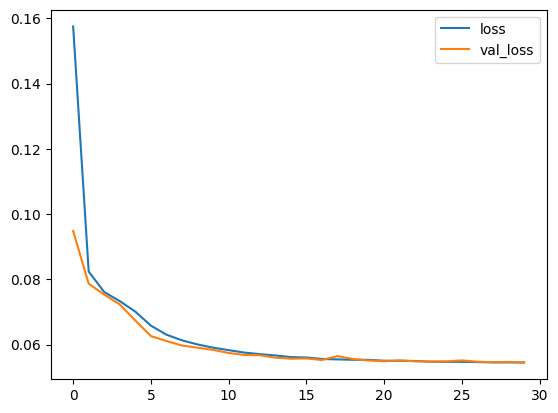

In [86]:
pd.DataFrame(history.history).plot()

In [105]:
es = EarlyStopping(patience = 5, 
                   restore_best_weights=True,
                   monitor='val_loss',
                  )

history = model.fit(mod_.X_train[vars].to_numpy(), 
          mod_.y_train.to_numpy(), 
          batch_size=32, 
          epochs=300,
          validation_split=0.2,
          verbose = True,
          callbacks=[es])

Epoch 1/300
248/248 [==============================] - 1s 3ms/step - loss: 0.1899 - val_loss: 0.0963
Epoch 2/300
248/248 [==============================] - 1s 2ms/step - loss: 0.0928 - val_loss: 0.0786
Epoch 3/300
248/248 [==============================] - 1s 2ms/step - loss: 0.0801 - val_loss: 0.0729
Epoch 4/300
248/248 [==============================] - 1s 2ms/step - loss: 0.0748 - val_loss: 0.0682
Epoch 5/300
248/248 [==============================] - 1s 3ms/step - loss: 0.0719 - val_loss: 0.0652
Epoch 6/300
248/248 [==============================] - 1s 3ms/step - loss: 0.0700 - val_loss: 0.0650
Epoch 7/300
248/248 [==============================] - 1s 3ms/step - loss: 0.0681 - val_loss: 0.0622
Epoch 8/300
248/248 [==============================] - 1s 3ms/step - loss: 0.0667 - val_loss: 0.0627
Epoch 9/300
248/248 [==============================] - 1s 3ms/step - loss: 0.0662 - val_loss: 0.0607
Epoch 10/300
248/248 [==============================] - 1s 3ms/step - loss: 0.0652 - val_lo

<Axes: >

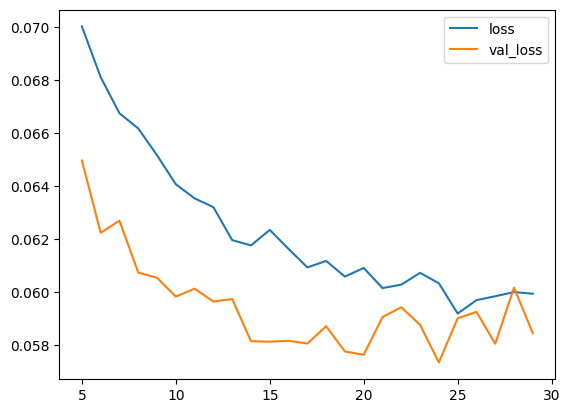

In [106]:
pd.DataFrame(history.history)[5:].plot()

In [107]:
model.evaluate(mod_.X_test[vars], mod_.y_test)

78/78 [==============================] - 0s 2ms/step - loss: 0.0570


0.05699925869703293